## Maps Analysis Notebooks

### `plotting_maps_by_seqid.ipynb`

This notebook is designed to plot maps corresponding to a set of requested sequence IDs.    
The provided sample sequence IDs are the one plotted in the `/stats_analysis/analysis_plotting_averaged_scores.ipynb` in the section **Picking a representative (visually) set of points to plot them**.

In [1]:
import pandas as pd
import h5py

from akita_utils.utils import ut_dense
from akita_utils.stats_utils import get_map_matrix, plot_map

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df with all experiments
experiments_tsv = "./../../input_data/filtered_base_mouse_ctcf_boundary.tsv"
experiments_df = pd.read_table(experiments_tsv, sep="\t")

In [3]:
# parameters
nr_backgrounds = len(experiments_df.background_index.unique())
nr_sites = len(experiments_df) // nr_backgrounds

model_index = 1
head_index = 1

# requested background and target ids
request_bg_id = 0
request_tg_ids = [1, 4]

# requested seq_id
sample = [480, 1060, 3885, 7070, 210, 1260, 5110, 7175, 5313, 7546, 2956, 1189, 2006]
sample.sort()

sample_exp_id = [experiments_df.iloc[sample_id]["exp_id"] for sample_id in sample]


# Boundary maps

In [5]:
job_h5_file = f"/scratch2/smaruj/all_dots_vs_boundaries/maps_boundaries_all_motifs_m{model_index}/MAPS_OUT.h5"

SEQ_ID:  210
	-target:  1


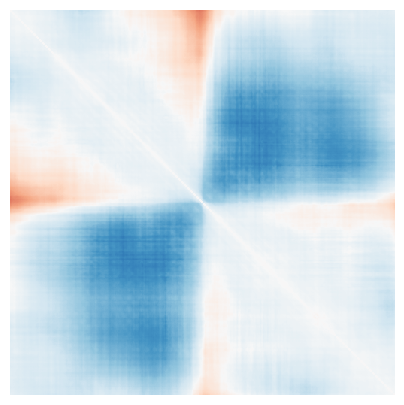

	-target:  4


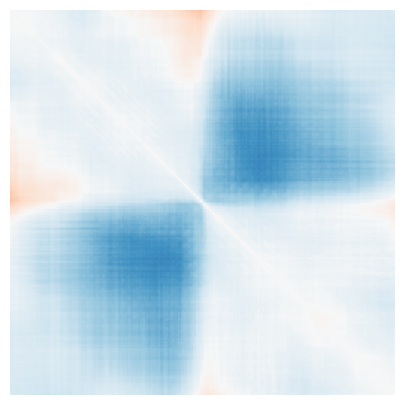

SEQ_ID:  480
	-target:  1


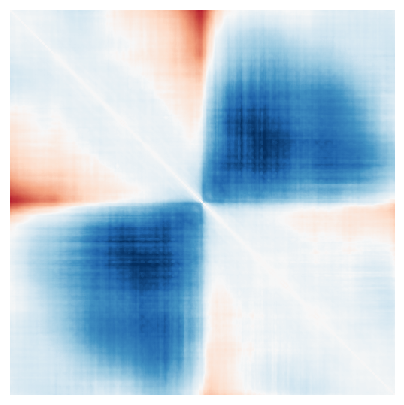

	-target:  4


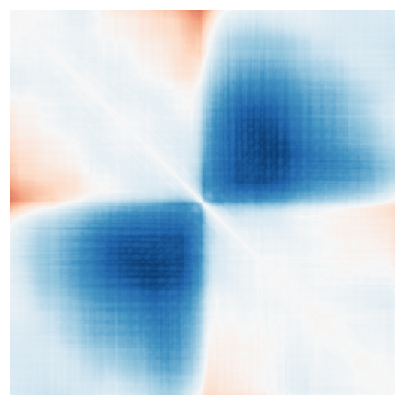

SEQ_ID:  1060
	-target:  1


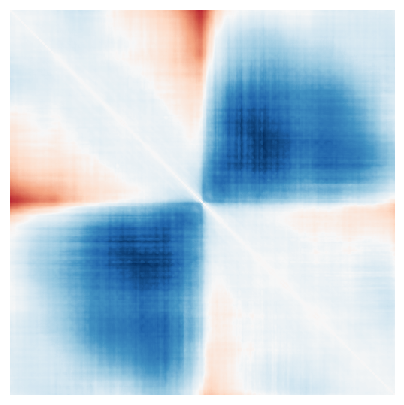

	-target:  4


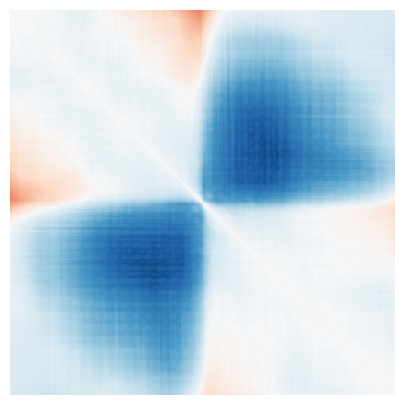

SEQ_ID:  1189
	-target:  1


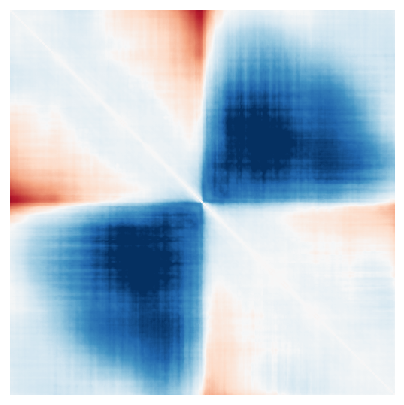

	-target:  4


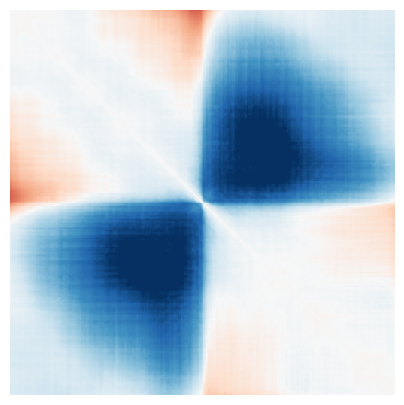

SEQ_ID:  1260
	-target:  1


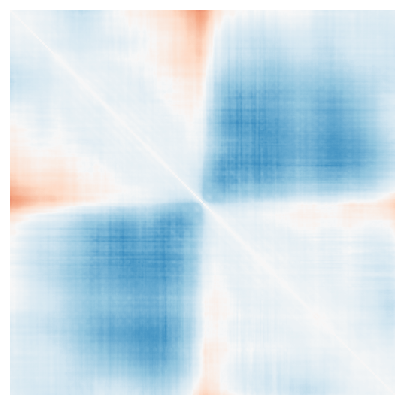

	-target:  4


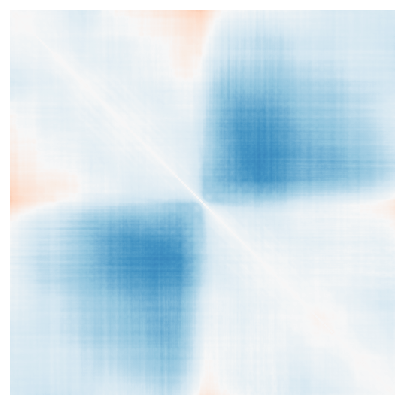

SEQ_ID:  2006
	-target:  1


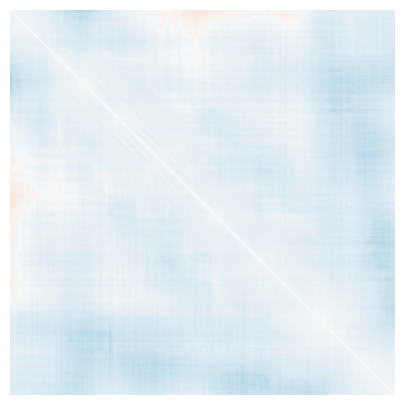

	-target:  4


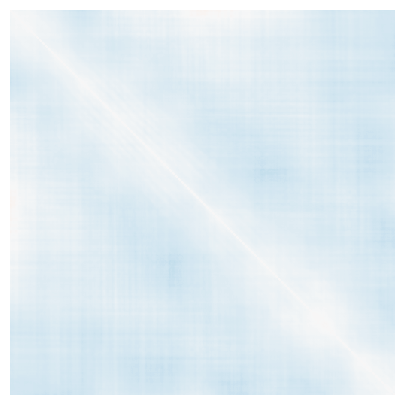

SEQ_ID:  2956
	-target:  1


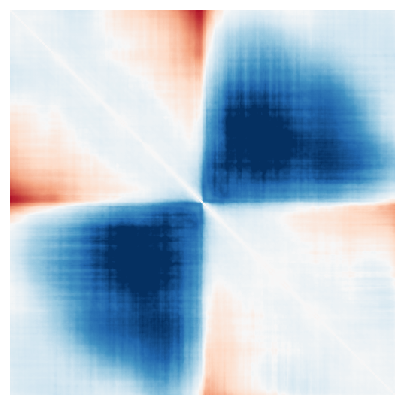

	-target:  4


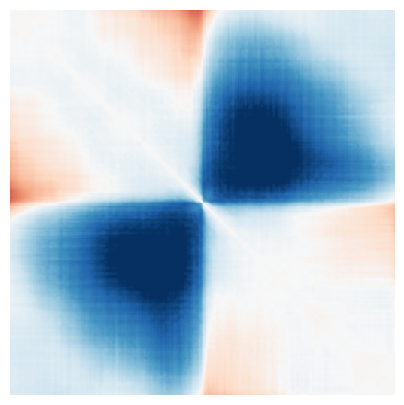

SEQ_ID:  3885
	-target:  1


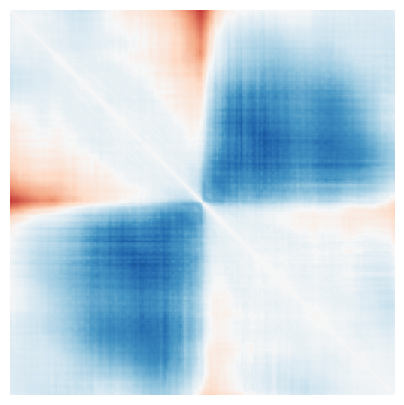

	-target:  4


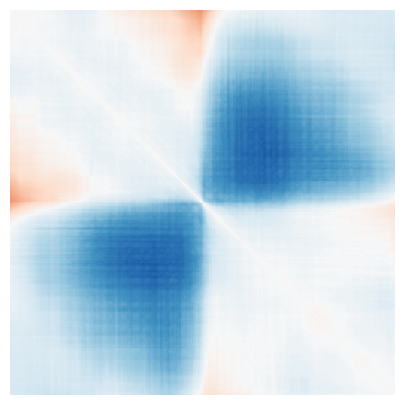

SEQ_ID:  5110
	-target:  1


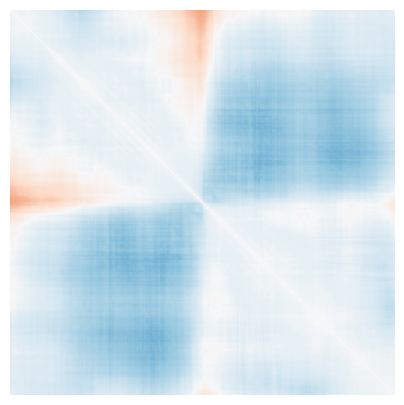

	-target:  4


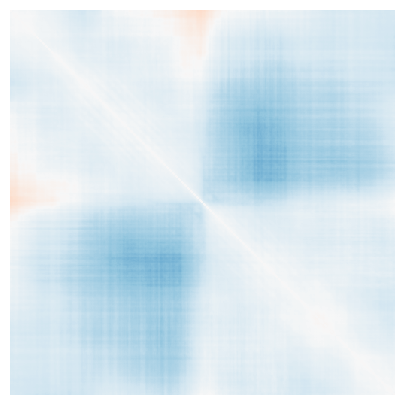

SEQ_ID:  5313
	-target:  1


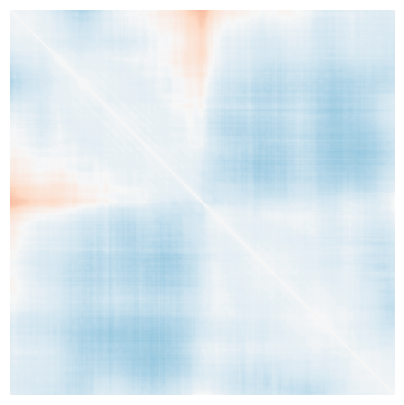

	-target:  4


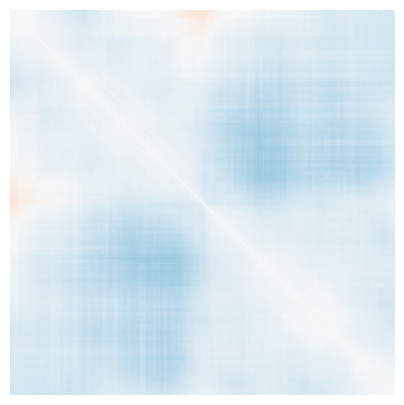

SEQ_ID:  7070
	-target:  1


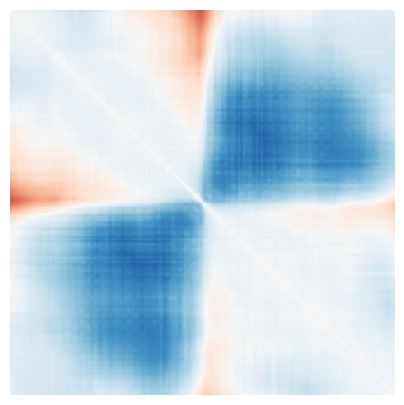

	-target:  4


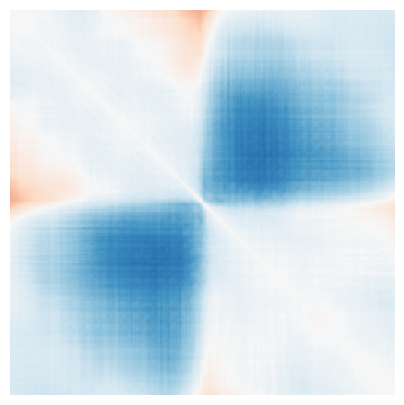

SEQ_ID:  7175
	-target:  1


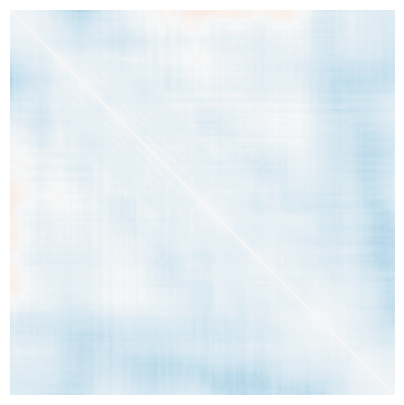

	-target:  4


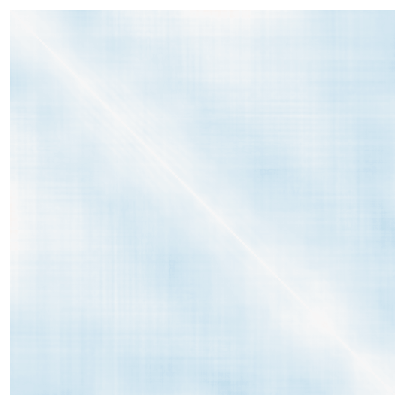

SEQ_ID:  7546
	-target:  1


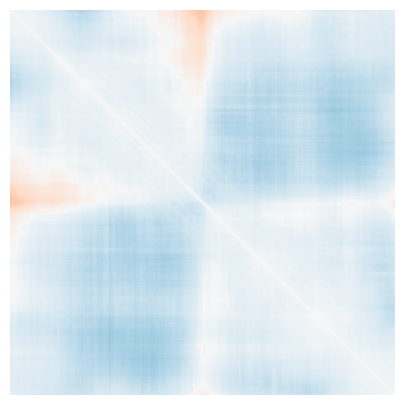

	-target:  4


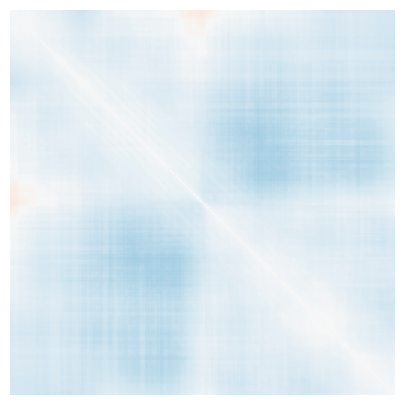

In [6]:
# Open the HDF5 file in read mode
with h5py.File(job_h5_file, "r") as hdf_file:
    for index in range(len(sample_exp_id)):
        seq_id = sample[index]
        request_exp_id = sample_exp_id[index]
        
        print("SEQ_ID: ", seq_id)
        
        # Read the specific portion of the dataset without loading the entire dataset into memory
        experiment_slice = hdf_file[f"map_h{head_index}_m{model_index}"][request_exp_id, :, :]
        map_matrix = ut_dense(experiment_slice)

        for request_tg_id in request_tg_ids:
            print("\t-target: ", request_tg_id)
            plot_map(map_matrix[:, :, request_tg_id])


# Dot maps

In [7]:
job_h5_file = f"/scratch2/smaruj/all_dots_vs_boundaries/maps_dots_all_motifs_m{model_index}/MAPS_OUT.h5"

SEQ_ID:  210
	-target:  1


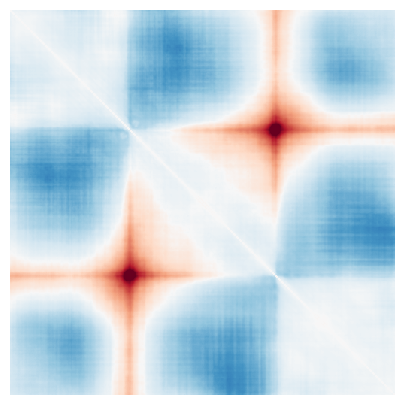

	-target:  4


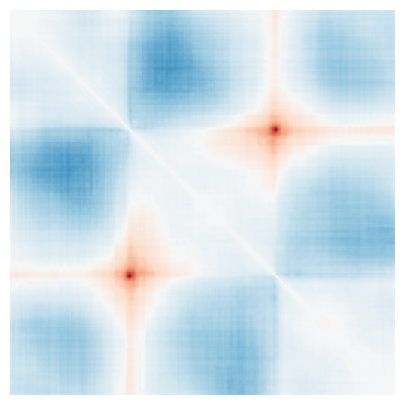

SEQ_ID:  480
	-target:  1


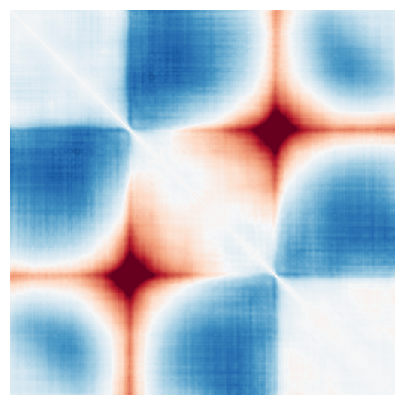

	-target:  4


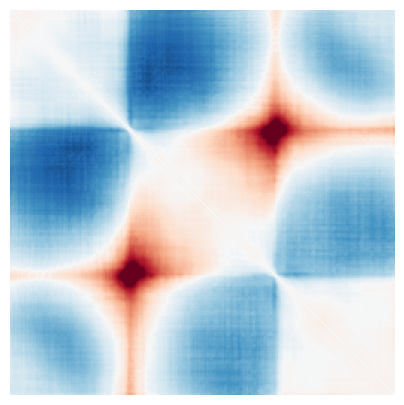

SEQ_ID:  1060
	-target:  1


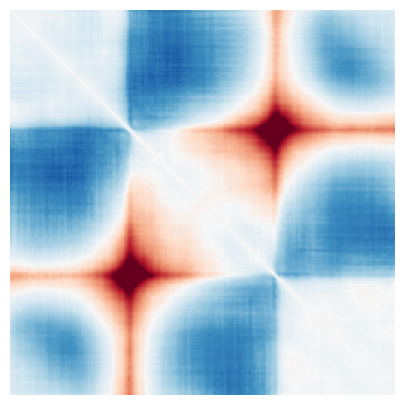

	-target:  4


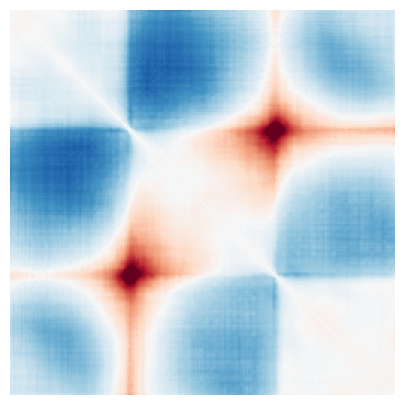

SEQ_ID:  1189
	-target:  1


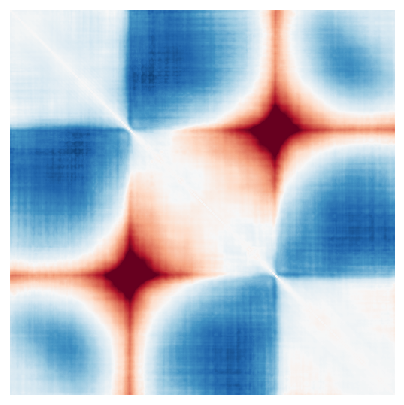

	-target:  4


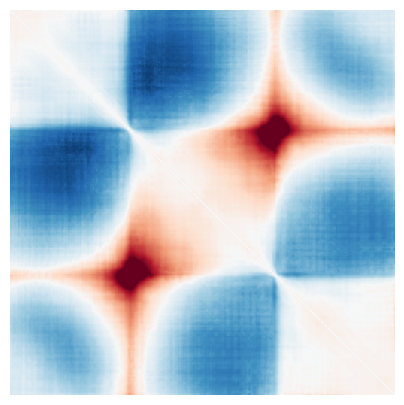

SEQ_ID:  1260
	-target:  1


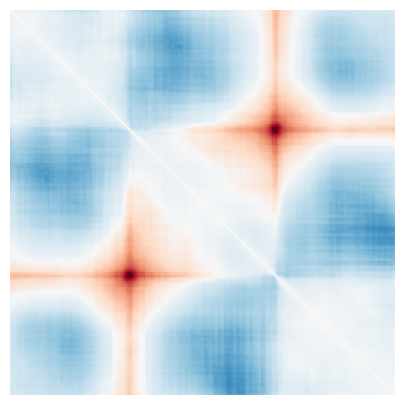

	-target:  4


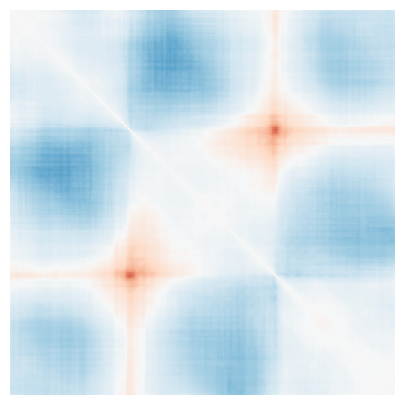

SEQ_ID:  2006
	-target:  1


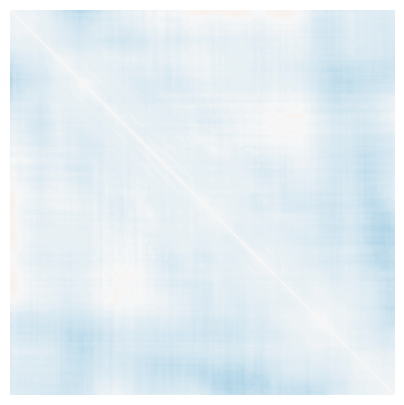

	-target:  4


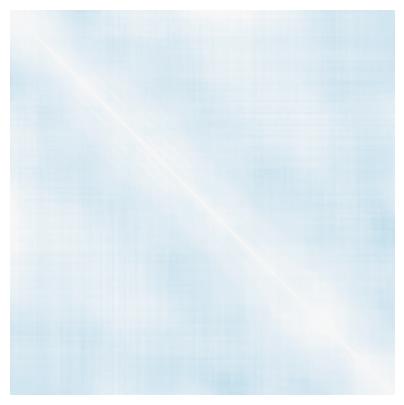

SEQ_ID:  2956
	-target:  1


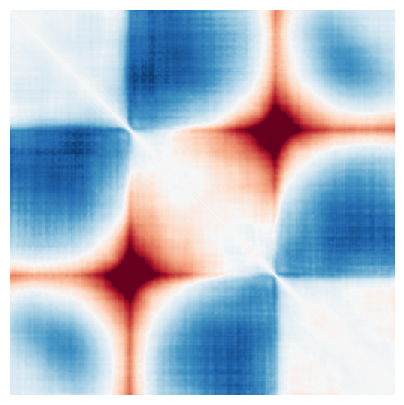

	-target:  4


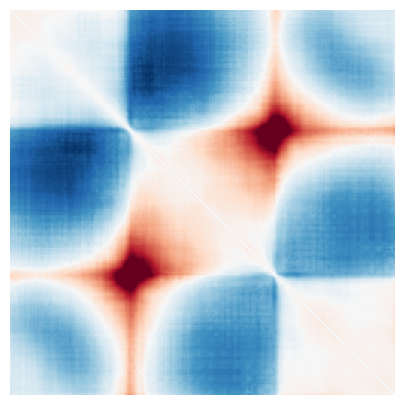

SEQ_ID:  3885
	-target:  1


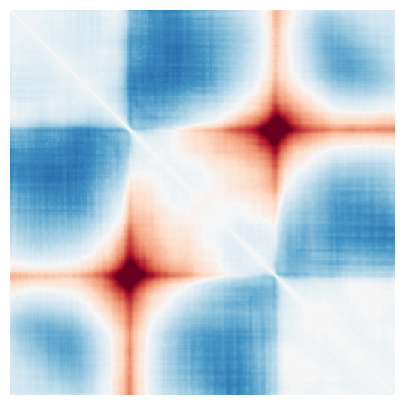

	-target:  4


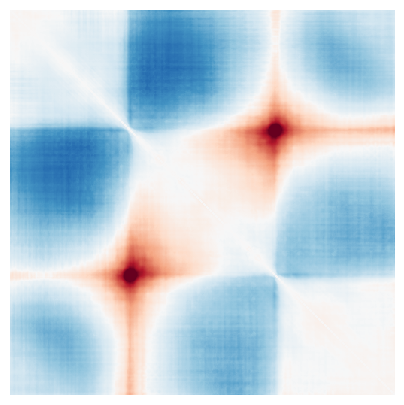

SEQ_ID:  5110
	-target:  1


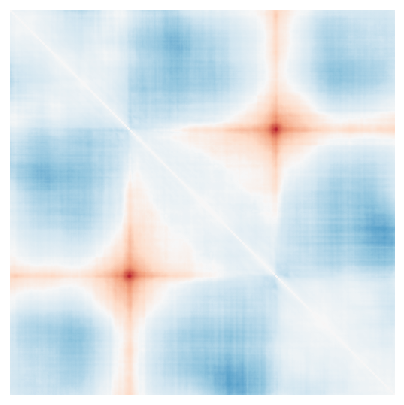

	-target:  4


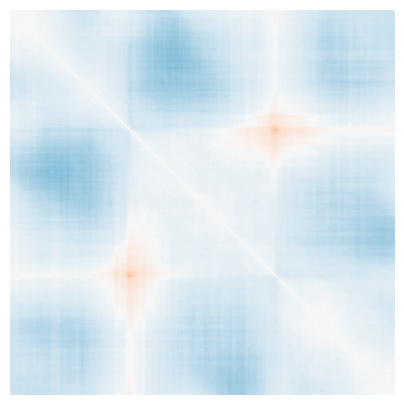

SEQ_ID:  5313
	-target:  1


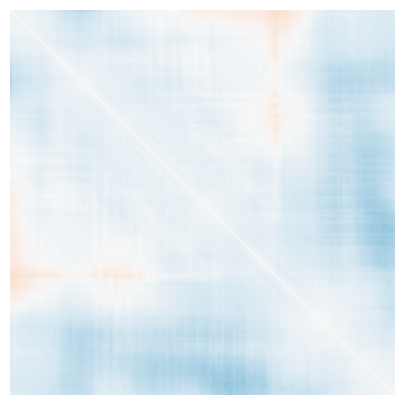

	-target:  4


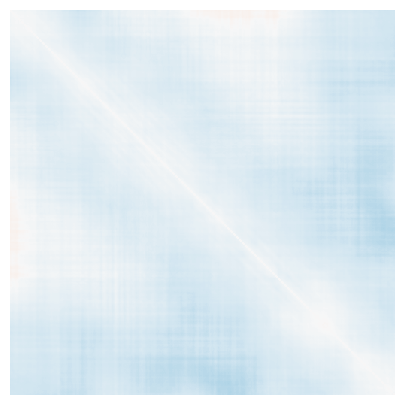

SEQ_ID:  7070
	-target:  1


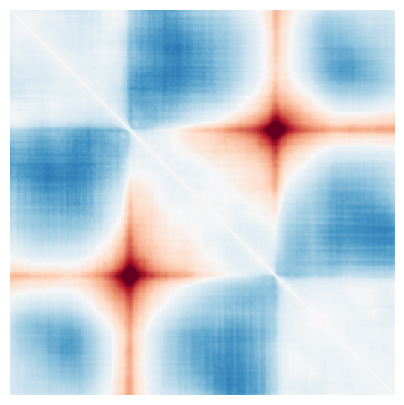

	-target:  4


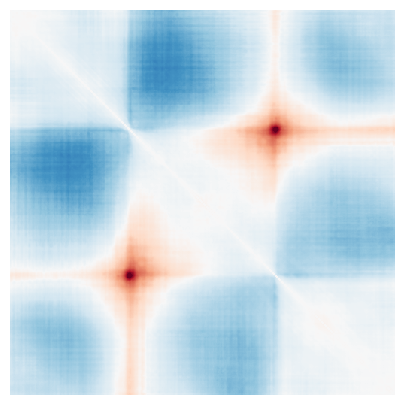

SEQ_ID:  7175
	-target:  1


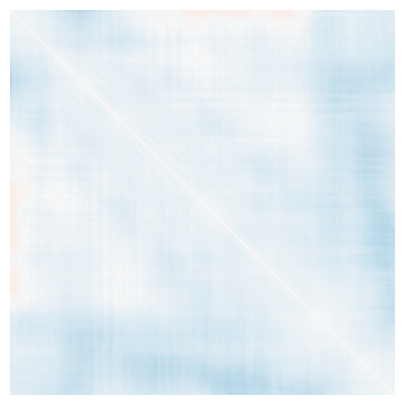

	-target:  4


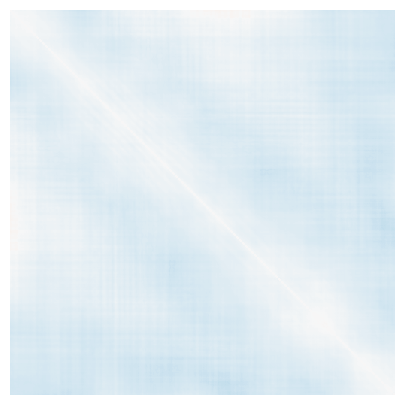

SEQ_ID:  7546
	-target:  1


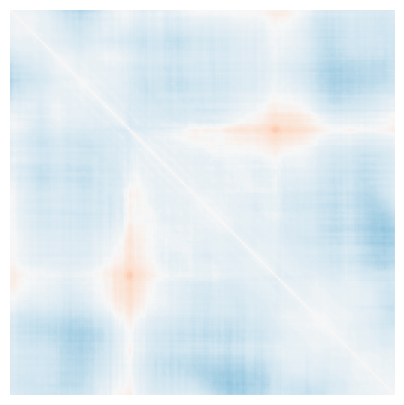

	-target:  4


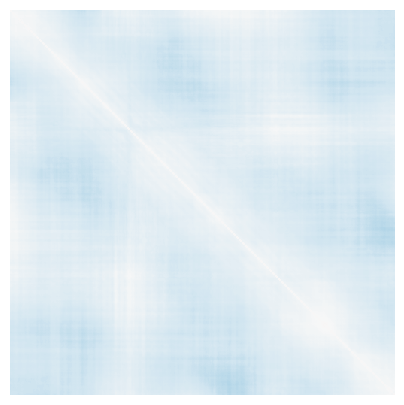

In [8]:
# Open the HDF5 file in read mode
with h5py.File(job_h5_file, "r") as hdf_file:
    for index in range(len(sample_exp_id)):
        seq_id = sample[index]
        request_exp_id = sample_exp_id[index]
        
        print("SEQ_ID: ", seq_id)
        
        # Read the specific portion of the dataset without loading the entire dataset into memory
        experiment_slice = hdf_file[f"map_h{head_index}_m{model_index}"][request_exp_id, :, :]
        map_matrix = ut_dense(experiment_slice)

        for request_tg_id in request_tg_ids:
            print("\t-target: ", request_tg_id)
            plot_map(map_matrix[:, :, request_tg_id])
